<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tkinter as tk
import re

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(Matrix, Vector):
    '''
    X - матрицы (n, n) Matrix
    V - векторы (n, 1) Vector
    Гарантируется, что len(X) == len(V)
    '''
    newArr = []
    #testArr = np.multiply.outer(Matrix,Vector)
    #testArr.shape()

    if (len(Matrix) == len(Vector)):
        for i in Matrix:
            for e in i:
                if (len(newArr) < len(Vector)):
                    newArr.append(e * Vector[i.index(e)])
                else:
                    newArr[i.index(e)] = newArr[i.index(e)] + e * Vector[i.index(e)]
    #print(f"testArr = {testArr}")
    if (newArr != []):
        result = newArr
    else:
        result = "Ошибка! Размерность массивов не совпадает с условием (len(M) == len(V))"
    return result
    pass

# Тесты
#arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
#vec = np.array([1,2,3])
arr = ([[1,2,3],[4,5,6],[7,8,9]])
vec = ([1,2,3])
vecError = ([1,2,3,4])
print(sum_prod(arr,vec)) # [12, 30, 54]
print(sum_prod(arr,vecError)) # Error

def test():
    assert(sum_prod(arr,vec)) == [12, 30, 54]
    assert(sum_prod(arr,vecError)) == "Ошибка! Размерность массивов не совпадает с условием (len(M) == len(V))"

[12, 30, 54]
Ошибка! Размерность массивов не совпадает с условием (len(M) == len(V))


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)
    pass

# Тесты
arr = np.array([[0.1,0.2,0.3],[0.4,0.5,0.6],[0.7,0.8,0.9]])
print(binarize(arr)) # [[0 0 0][0 0 1][1 1 1]]

def test():
    assert(binarize(arr)) == [[0, 0, 0],[0, 0, 1],[1, 1, 1]]

[[0 0 0]
 [0 0 1]
 [1 1 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
# Тут есть вопросы...
def unique_rows(mat):
    # Временное хранилище матрицы, после возвращает все наработки через uniqueArr
    result = mat
    
    # Временное хранилище уникальных элементов
    uniqueArr = ([])
    
    for i in result:
        uniqueArr.append(np.unique(i))
    
    result = np.array(uniqueArr)
    return result
    pass

def transposeArr(arr):
    subArr_size = len(arr[0])
    return [[e[i] for e in arr] for i in range(subArr_size)]

def unique_columns(mat):
    # Временное хранилище и после, возвращает все наработки через uniqueArr
    result = transposeArr(mat)
    
    # Временное хранилище уникальных элементов
    uniqueArr = ([])
    
    for i in result:
        uniqueArr.append(np.unique(i))
    
    result = np.array(uniqueArr)
    return result
    pass

# Тесты
matrixQueRows = np.array([[1,2,2,3,3], [4,5,6,5,4], [7,7,8,8,9]])
matrixQueColumns = np.array([[1,2,3], [2,3,4], [1,2,3]])

print(unique_rows(matrixQueRows))
print(unique_columns(matrixQueColumns))

def test():
    assert(unique_rows(matrixQueRows)) == [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    assert(unique_columns(matrixQueColumns)) == [[1, 2], [2, 3], [3, 4]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [2 3]
 [3 4]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

arr : [[1, 5], [8, 1]]
mathWaiting in arr : [3.  4.5]
variance in arr : [7.25  3.125]

transposeArr : [[1, 8], [5, 1]]
tMathWaiting in tArr : [4.5 3. ]
tVariance in tArr : [3.125 7.25 ]


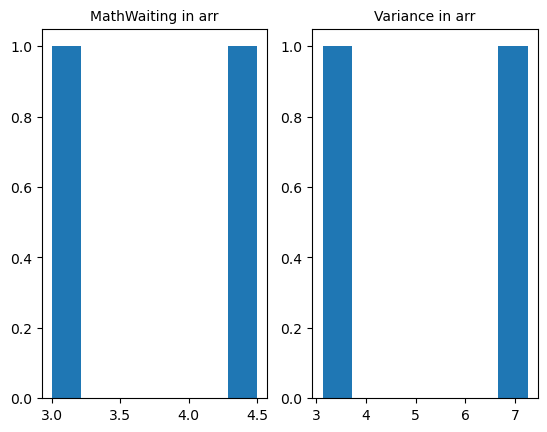

In [5]:
# Функция для поиска мат. ожидания
def seakMathWait(arr):
    return np.mean(arr)

# Функция для поиска дисперсии
def seakVariance(arr, mathWait, maxElements):
    quadraticDeviation = 0
    for i in arr:
        quadraticDeviation += ((i - mathWait) ** 2)
    variance = quadraticDeviation / maxElements
    return variance

# Уже есть в задаче выше... (Но оставил как отдельное дополнение, если этот блок сделать отдельным)
# Функция для прохождения, по столбцам матрицы
#def transposeArr(arr):
#    subArr_size = len(arr[0])
#    return [[e[i] for e in arr] for i in range(subArr_size)]

# Расчёт мат. ожидания
def mathWaitArr(arr):
    # Создаём пустой array, для сохранения мат. ожидания
    mathWaitArray = ([])
    
    # Считает мат. ожидание (среднее значение), для каждой строки
    for i in arr:
        mathWaitArray.append(seakMathWait(i))
    return np.array(mathWaitArray)

# Функция для рисования гистограмм
def histMathWaitVariance(arr, arrMathWait, arrVariance, IsTransposeArr):
    if (IsTransposeArr == True):
        nameHist = ["tMathWaiting in tArr","tVariance in tArr"]
    else:
        nameHist = ["MathWaiting in arr","Variance in arr"]
    
    fig, axs = plt.subplots(ncols=2)
        
    axs[0].hist(arrMathWait, bins = len(arrMathWait)+5)
    
    # Title and labels
    axs[0].set_title(f"{nameHist[0]}", size = 10)
    
    axs[1].hist(arrVariance, bins = len(arrVariance)+5)
    
    # Title and labels
    axs[1].set_title(f"{nameHist[1]}", size = 10)
    
# Основная функция
def mathWaitVarianceArrHist(m, n):
    # Определяем матрицу и заполняем случайными числами от 1 до 10
    arr = [[random.randint(1,10) for e in range(n)] for i in range(m)]
    print(f"arr : {arr}")
    
    mathWaiting = mathWaitArr(arr)
    print(f"mathWaiting in arr : {mathWaiting}")
    
    # Поиск дисперсии матрицы
    variance = seakVariance(arr, mathWaiting, n*m)
    print(f"variance in arr : {variance}")
    
    print()
    # Обратная матрица
    tArr = transposeArr(arr)
    print(f"transposeArr : {tArr}")
    
    # Мат. ожидание по столбцам
    tMathWaiting = mathWaitArr(tArr)
    print(f"tMathWaiting in tArr : {tMathWaiting}")
    
    # Дисперсия по столбцам
    tVariance = seakVariance(tArr, tMathWaiting, n*m)
    print(f"tVariance in tArr : {tVariance}")

    # arr hist
    histMathWaitVariance(arr, mathWaiting, variance, False)
    
    pass

mathWaitVarianceArrHist(2,2)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    # Доп. параметры для выполнения задания
    IsLastA = False
    arr = [[0 for j in range(n)] for i in range(m)]
    
    # Немного красоты в вывод
    for i in range(n + 2):
        print(f"-", end = " ")
    print()
    
    # Основной цикл
    for i in range(m):
        print("|", end = " ")
        for j in range(n):
            if (IsLastA == False):
                arr[i][j] = a
                print(f"{a}", end = " ")
                IsLastA = True
            else:
                arr[i][j] = b
                print(f"{b}", end = " ")
                IsLastA = False
        print(end = "|\n")
    
    # Немного красоты в вывод
    for i in range(n + 2):
        print(f"-", end = " ")
    print()
    #return arr
    pass

# Тесты
chess(3,3,0,1)
print()
chess(1,3,0,1)
print()
chess(2,3,0,1)

def test():
    assert(chess(3,3,0,1)) == [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
    assert(chess(1,3,0,1)) == [[0, 1, 0]]
    assert(chess(2,3,0,1)) == [[0, 1, 0], [1, 0, 1]]

- - - - - 
| 0 1 0 |
| 1 0 1 |
| 0 1 0 |
- - - - - 

- - - - - 
| 0 1 0 |
- - - - - 

- - - - - 
| 0 1 0 |
| 1 0 1 |
- - - - - 


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [7]:
def checkDoubleRGB(RGB1, RGB2):
    result = False
    # Проверка введённых данных на схему RGB
    match1 = re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', RGB1)
    match2 = re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', RGB2)
    
    if match1 and match2:
        result = True
    else:
        result = False
    return result

def draw_rectangle(widthRect, heightRect, widthCanvas, heightCanvas, rectangle_color, background_color):
    # Проверка на схему RGB
    result = checkDoubleRGB(rectangle_color, background_color)
    
    if result == True:
        # Создаём полотно (Окно)
        root = tk.Tk()
        root.title("Rectangle")
        root.geometry(f"{widthCanvas}x{heightCanvas}")

        # Создаём прямоугольник (Полотно для отрисовки фигур)
        canvas = tk.Canvas(
            root,
            width = widthCanvas, height = heightCanvas,
            bg = f"{background_color}")
        # Делаем ориентацию в центре
        canvas.pack(anchor = tk.CENTER, expand = True)

        # Тут мы отрисовываем фигуру
        # Если мы хотим увидеть прямоугольник в центре,
        # то нам нужно сделать пару мат. операций
        beginW = (widthCanvas - widthRect )/2
        beginH = (heightCanvas - heightRect )/2
        endW = (widthRect + widthCanvas)/2
        endH = (heightRect + heightCanvas)/2
        canvas.create_rectangle((beginW,beginH),(endW,endH), fill=f"{rectangle_color}")

        # Вывод
        root.mainloop()
    else:
        result = "Ошибка! Вы ввели не RGB схему, в rectangle_color или background_color!"
    return result
    pass

def draw_ellipse(widthOval, heightOval, widthCanvas, heightCanvas, ellipse_color, background_color):
    # Проверка на схему RGB
    result = checkDoubleRGB(ellipse_color, background_color)
    
    if result == True:
        # Создаём полотно (Окно)
        root = tk.Tk()
        root.title("Ellipse")
        root.geometry(f"{widthCanvas}x{heightCanvas}")

        # Создаём элипс (Полотно для отрисовки фигур)
        canvas = tk.Canvas(
            root,
            width = widthCanvas, height = heightCanvas,
            bg = f"{background_color}")
        # Делаем ориентацию в центре
        canvas.pack(anchor = tk.CENTER, expand = True)

        # Тут мы отрисовываем фигуру
        # Если мы хотим увидеть прямоугольник в центре,
        # то нам нужно сделать пару мат. операций
        beginW = (widthCanvas - widthOval )/2
        beginH = (heightCanvas - heightOval )/2
        endW = (widthOval + widthCanvas)/2
        endH = (heightOval + heightCanvas)/2
        canvas.create_oval((beginW,beginH),(endW,endH), fill=f"{ellipse_color}")

        # Вывод
        root.mainloop()
    else:
        result = "Ошибка! Вы ввели не RGB схему, в rectangle_color или background_color!"
    return result
    pass

def draw_arc(widthArc, heightArc, widthCanvas, heightCanvas, arc_color, background_color):
    # Проверка на схему RGB
    result = checkDoubleRGB(arc_color, background_color)
    
    if result == True:
        # Создаём полотно (Окно)
        root = tk.Tk()
        root.title("Ark")
        root.geometry(f"{widthCanvas}x{heightCanvas}")

        # Создаём элипс (Полотно для отрисовки фигур)
        canvas = tk.Canvas(
            root,
            width = widthCanvas, height = heightCanvas,
            bg = f"{background_color}")
        # Делаем ориентацию в центре
        canvas.pack(anchor = tk.CENTER, expand = True)

        # Тут мы отрисовываем фигуру
        # Если мы хотим увидеть прямоугольник в центре,
        # то нам нужно сделать пару мат. операций
        beginW = (widthCanvas - widthArc )/2
        beginH = (heightCanvas - heightArc )/2
        endW = (widthArc + widthCanvas)/2
        endH = (heightArc + heightCanvas)/2
        canvas.create_arc((beginW,beginH),(endW,endH), fill=f"{arc_color}")

        # Вывод
        root.mainloop()
    else:
        result = "Ошибка! Вы ввели не RGB схему, в rectangle_color или background_color!"
    return result
    pass

# Тесты
draw_rectangle(100, 100, 200, 200, "#ffffff", "#000000")
draw_ellipse(100, 150, 200, 250, "#000000", "#ffffff")
draw_arc(100, 100, 200, 200, "#ffffff", "#000000")

def test():
    assert(draw_rectangle(100, 100, 200, 200, "#ffffff", "#000000")) == True
    assert(draw_ellipse(100, 150, 200, 250, "#000000", "#ffffff")) == True
    assert(draw_arc(100, 100, 200, 200, "#ffffff", "#000000")) == True

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [9]:
# Функция для поиска мат. ожидания
def seakMathWait(arr):
    return np.mean(arr)

# Функция для поиска дисперсии
def seakVariance(arr, mathWait, maxElements):
    quadraticDeviation = 0
    for i in arr:
        quadraticDeviation += ((i - mathWait) ** 2)
    variance = quadraticDeviation / maxElements
    return variance

# Поиск СКО - среднее квадратичное отклонение
def seakMeanSquareDeviation(_variance):
    return np.sqrt(_variance)

# Поиск локальных точек максимума
def seakLocalMaxima(arr):
    # Создание массива
    maxPoints = []
    
    # Проверка 1-ого элемента
    if (arr[0] > arr[1]):
        maxPoints.append(0)
    
    # Проверка целого массива, кроме последнего значения
    for i in range(1,len(arr)-1):
        if (arr[i-1] < arr[i] > arr[i + 1]):
            maxPoints.append(i)
    
    if (arr[-1] > arr[-2]):
        maxPoints.append(len(arr)-1)
    
    return maxPoints

# Поиск локальных точек минимума
def seakLocalMinima(arr):
    # Создание массива
    minPoints = []
    
    # Проверка 1-ого элемента
    if (arr[0] < arr[1]):
        minPoints.append(0)
    
    # Проверка целого массива, кроме последнего значения
    for i in range(1,len(arr)-1):
        if (arr[i-1] > arr[i] < arr[i + 1]):
            minPoints.append(i)
    
    if (arr[-1] < arr[-2]):
        minPoints.append(len(arr)-1)
    
    return minPoints

def seakMovingAverage(arr, average):
    moving_average = []
    i = 0
    
    # Основной цикл для вычисления и заполнения array
    while i < len(arr) - average + 1:
        # Получаем часть arr, по average и перебираем её через while
        currentWindow = arr[i : i + average]
        
        # Основное вычисление скользящего среднего числа по average in arr
        currentWindowAverage = round(sum(currentWindow) / average, 1)
        
        # Добавление данного вычисления, в новый список средних, скользящих чисел
        moving_average.append(currentWindowAverage)
        
        i += 1
        
    return moving_average

# Основная функция
def mathArr(lenArr, average):
    # Определяем матрицу и заполняем случайными числами от 1 до 10
    arr = [random.randint(-10,10) for e in range(lenArr)]
    print(f"arr : {arr}")
    
    # Мат. ожидание
    mathWaiting = seakMathWait(arr)
    print(f"mathWaiting in arr : {mathWaiting}")

    # Поиск дисперсии матрицы
    variance = seakVariance(arr, mathWaiting, len(arr))
    print(f"variance in arr : {variance}")

    # Поиск СКО по дисперсии
    meanSquareDeviation = seakMeanSquareDeviation(variance)
    print(f"meanSquareDeviation in arr : {meanSquareDeviation}")
    
    # Поиск point max and min
    maxPointArr = seakLocalMaxima(arr)
    print(f"maxPointArr (index) in arr : {maxPointArr}")
    minPointArr = seakLocalMinima(arr)
    print(f"minPointArr (index) in arr : {minPointArr}")
    
    # Поиск скользящего среднего по числу average
    movingAverage = seakMovingAverage(arr, average)
    print(f"movingAverage in arr by {average} : ", end = " ")
    for i in movingAverage:
        print(f"[{i}]", end = " ")
    print()
    
    pass

mathArr(5,3)

arr : [-5, -1, 10, 3, -9]
mathWaiting in arr : -0.4
variance in arr : 43.04
meanSquareDeviation in arr : 6.56048778674269
maxPointArr (index) in arr : [2]
minPointArr (index) in arr : [0, 4]
movingAverage in arr by 3 :  [1.3] [4.0] [1.3] 


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [26]:
def oneHotEncodingRndArr(lenArr, maxRndInt):
    # Заполняем вектор рандомными числами
    arr = [random.randint(0, maxRndInt) for _ in range(lenArr)]
    
    # Список используемых чисел, для нашего метода, он же отвечает за размер строки в массиве
    # maxRndInt + 1, так как maxRndInt включительно рандомится
    dictionaryCountInt = [i for i in range(maxRndInt + 1)]
    
    # Проверка
    print(f"arr : {arr}")
    print(f"dictionaryCountInt : {dictionaryCountInt}")
    
    # Наш бутущий результат работы, в соновном цикле
    oneHotEncoded = list()
    
    for value in arr:
        elem = [0 for _ in range(len(dictionaryCountInt))]
        elem[value] = 1
        oneHotEncoded.append(elem)
    
    # Вывод
    print("oneHotEncoded :")
    for i in oneHotEncoded:
        print(i)
#
oneHotEncodingRndArr(5,10)

arr : [0, 2, 1, 7, 1]
dictionaryCountInt : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
oneHotEncoded :
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
